In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Generate sample data (7 features)
# Replace this with your actual dataset
# np.random.seed(42)
# n_samples = 500
# X, _ = make_swiss_roll(n_samples, noise=0.1)
# # Add 4 more random features to make it 7D
# X_extra = np.random.randn(n_samples, 4)
# X = np.concatenate([X, X_extra], axis=1)

df = pd.read_csv('data/heart.csv')


features = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']
X = df[features].values
n_samples = X.shape[0]

print(f"Original data shape: {X.shape}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Original data shape: (1025, 7)



Fitting Isomap with different components...
n_components=1: reconstruction_error=12.7489
n_components=2: reconstruction_error=10.3308
n_components=3: reconstruction_error=8.9775
n_components=4: reconstruction_error=7.7085
n_components=5: reconstruction_error=6.5848
n_components=6: reconstruction_error=6.0277


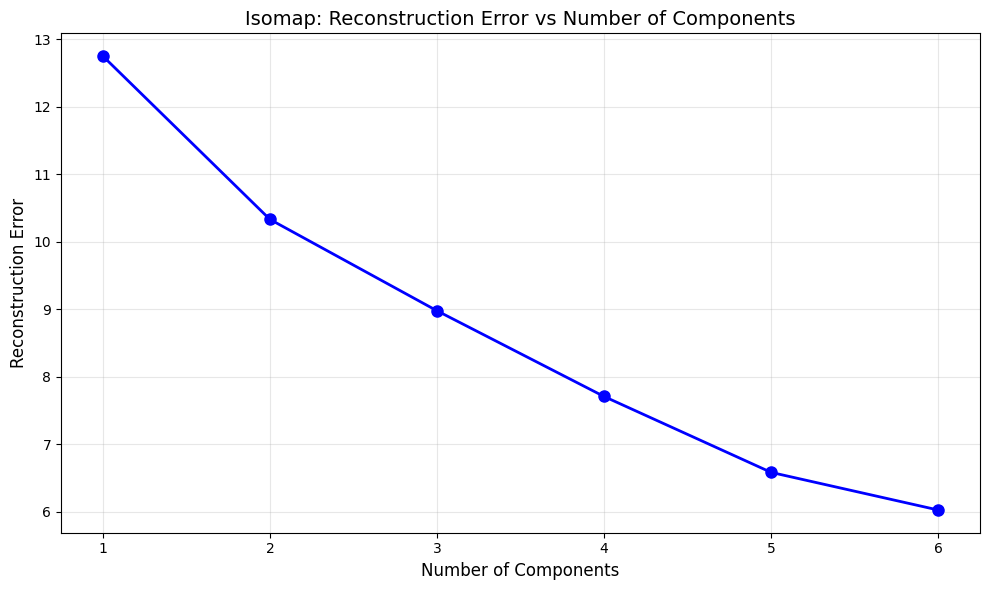

In [8]:
# 1. Test different numbers of components and plot reconstruction error
n_components_range = range(1, 7)
reconstruction_errors = []

print("\nFitting Isomap with different components...")
for n in n_components_range:
    isomap = Isomap(n_components=n, n_neighbors=10)
    isomap.fit(X_scaled)
    reconstruction_errors.append(isomap.reconstruction_error())
    print(f"n_components={n}: reconstruction_error={isomap.reconstruction_error():.4f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, reconstruction_errors, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.title('Isomap: Reconstruction Error vs Number of Components', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(n_components_range)
plt.tight_layout()
# plt.savefig('isomap_elbow.png', dpi=300, bbox_inches='tight')
plt.show()

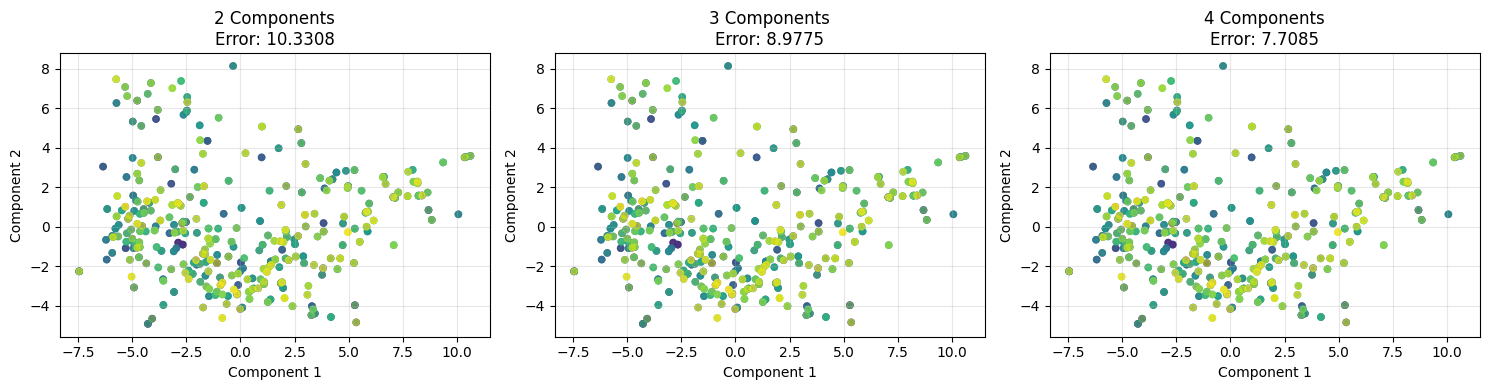

In [9]:
# 2. Apply Isomap with different dimensions for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, n_comp in enumerate([2, 3, 4]):
    isomap = Isomap(n_components=n_comp, n_neighbors=10)
    X_transformed = isomap.fit_transform(X_scaled)
    
    if n_comp == 2:
        axes[idx].scatter(X_transformed[:, 0], X_transformed[:, 1], 
                         c=range(n_samples), cmap='viridis', s=20, alpha=0.6)
        axes[idx].set_xlabel('Component 1')
        axes[idx].set_ylabel('Component 2')
    else:
        # For 3D and higher, plot first 2 components
        axes[idx].scatter(X_transformed[:, 0], X_transformed[:, 1], 
                         c=range(n_samples), cmap='viridis', s=20, alpha=0.6)
        axes[idx].set_xlabel('Component 1')
        axes[idx].set_ylabel('Component 2')
    
    axes[idx].set_title(f'{n_comp} Components\nError: {isomap.reconstruction_error():.4f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('isomap_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
# 3. Recommended: Use 3 components for final analysis
print("\n" + "="*60)
print("FINAL RECOMMENDATION")
print("="*60)

isomap_final = Isomap(n_components=2, n_neighbors=10)
X_final = isomap_final.fit_transform(X_scaled)

print(f"\nTransformed data shape: {X_final.shape}")
print(f"Reconstruction error: {isomap_final.reconstruction_error():.4f}")
print(f"\nVariance explained by each component:")
# Note: Isomap doesn't directly provide explained variance like PCA
# But we can look at the spread of each component
for i in range(X_final.shape[1]):
    var = np.var(X_final[:, i])
    print(f"  Component {i+1}: {var:.4f}")


FINAL RECOMMENDATION

Transformed data shape: (1025, 2)
Reconstruction error: 10.3308

Variance explained by each component:
  Component 1: 17.4762
  Component 2: 7.4704


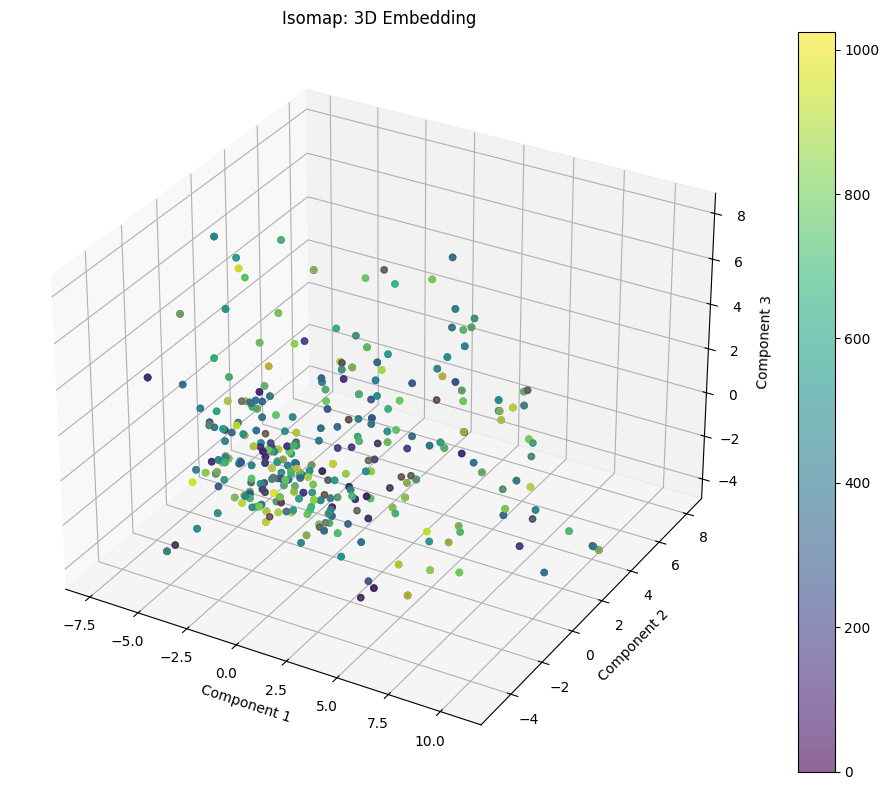

In [11]:
# 4. 3D visualization of final result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_final[:, 0], X_final[:, 1], X_final[:, 2],
                    c=range(n_samples), cmap='viridis', s=20, alpha=0.6)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Isomap: 3D Embedding')
plt.colorbar(scatter)
plt.tight_layout()
# plt.savefig('isomap_3d.png', dpi=300, bbox_inches='tight')
plt.show()